In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-poster")
%matplotlib inline
from scipy.integrate import solve_ivp

In [6]:
def my_RK4(ds, t_span, s0):
    n = 10
    h = 2*np.pi/(n-1)
    t = t_span
    s = np.zeros(np.size(t))
    s[0] = s0
  
    for i in range(0, np.size(t)-1):
        #公式
        k1 = ds(t[i], s[i])
        k2 = ds(t[i]+0.5*h, s[i]+0.5*h*k1)
        k3 = ds(t[i]+0.5*h, s[i]+0.5*h*k2)
        k4 = ds(t[i]+h, s[i]+h*k3)
        s[i+1] = s[i] + h*(k1+2*k2+2*k3+k4)/6
        #回傳[t, s]
    return [t, s]

In [7]:
f = lambda t, s:np.sin(np.exp(s))/(t+1)
n = 10
s0 = 0
t_span = np.linspace(0, 2*np.pi, n)

[t, s] = my_RK4(f, t_span, s0)
sol = solve_ivp(f,[0, 2*np.pi], [s0], t_eval = t_span) 

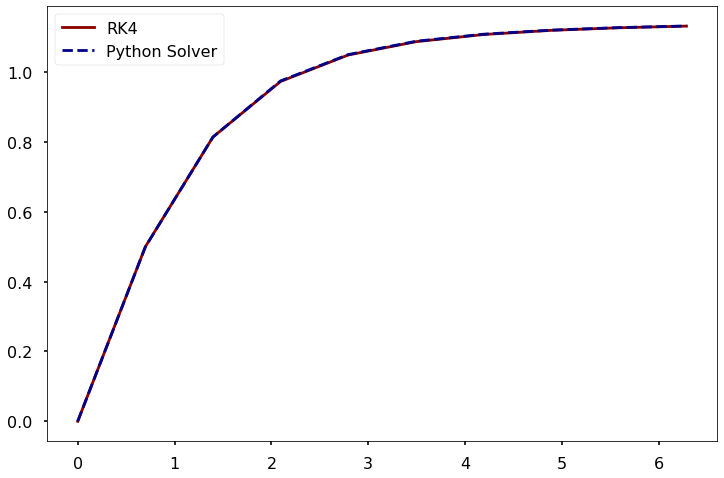

In [8]:
plt.figure(figsize = (12, 8))
plt.plot(t, s, linestyle = '-', color = 'darkred', label = "RK4")
plt.plot(sol.t, sol.y[0],linestyle = '--', color = 'darkblue', label = "Python Solver")
plt.legend()
plt.show()